## Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings

In [9]:
df = pd.read_csv("../data/data.csv")

In [10]:
df.head()

,DATE,NASDAQ.AAPL,NASDAQ.ADP,NASDAQ.CBOE,NASDAQ.CSCO,NASDAQ.EBAY
0,2017-04-03 13:30:00,143.6800,102.2300,81.03,33.7400,33.3975
1,2017-04-03 13:31:00,143.7000,102.1400,81.21,33.8800,33.3950
2,2017-04-03 13:32:00,143.6901,102.2125,81.21,33.9000,33.4100
3,2017-04-03 13:33:00,143.6400,102.1400,81.13,33.8499,33.3350
4,2017-04-03 13:34:00,143.6600,102.0600,81.12,33.8400,33.4000


## Data Preparation

In [11]:
df['DATE'] = pd.to_datetime(df['DATE'])

In [12]:
df.set_index('DATE',inplace=True)

In [13]:
df.head()

,NASDAQ.AAPL,NASDAQ.ADP,NASDAQ.CBOE,NASDAQ.CSCO,NASDAQ.EBAY
DATE,,,,,
2017-04-03 13:30:00,143.6800,102.2300,81.03,33.7400,33.3975
2017-04-03 13:31:00,143.7000,102.1400,81.21,33.8800,33.3950
2017-04-03 13:32:00,143.6901,102.2125,81.21,33.9000,33.4100
2017-04-03 13:33:00,143.6400,102.1400,81.13,33.8499,33.3350
2017-04-03 13:34:00,143.6600,102.0600,81.12,33.8400,33.4000


In [14]:
df = df[['NASDAQ.ADP']]

In [15]:
df

,NASDAQ.ADP
DATE,
2017-04-03 13:30:00,102.2300
2017-04-03 13:31:00,102.1400
2017-04-03 13:32:00,102.2125
2017-04-03 13:33:00,102.1400
2017-04-03 13:34:00,102.0600
...,...
2017-08-31 19:56:00,106.5650
2017-08-31 19:57:00,106.5900
2017-08-31 19:58:00,106.5200


## Data Visualization

<AxesSubplot:xlabel='DATE'>

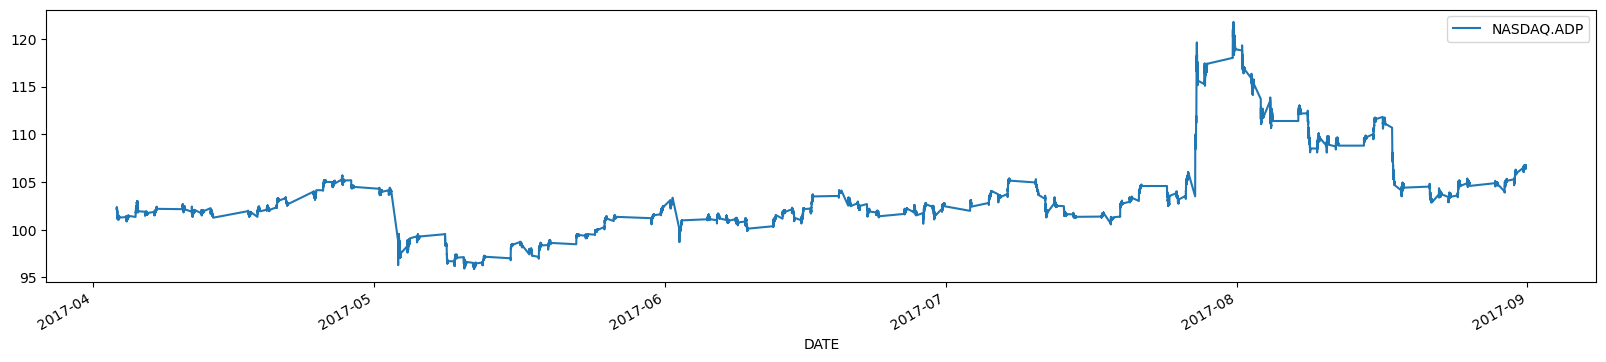

In [16]:
df.plot(figsize=(20,4))

In [17]:
df.index.month_name().unique()

Index(['April', 'May', 'June', 'July', 'August'], dtype='object', name='DATE')

In [18]:
df.index.day_name().unique()

Index(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'], dtype='object', name='DATE')

            NASDAQ.ADP
DATE                  
2017-04-03  101.481373
2017-04-04  101.193712
2017-04-05  102.475451
2017-04-06  101.724826
2017-04-07  101.967383
...                ...
2017-08-25  104.903227
2017-08-28  104.837479
2017-08-29  104.957696
2017-08-30  105.648867
2017-08-31  106.506074

[109 rows x 1 columns]


<AxesSubplot:xlabel='DATE'>

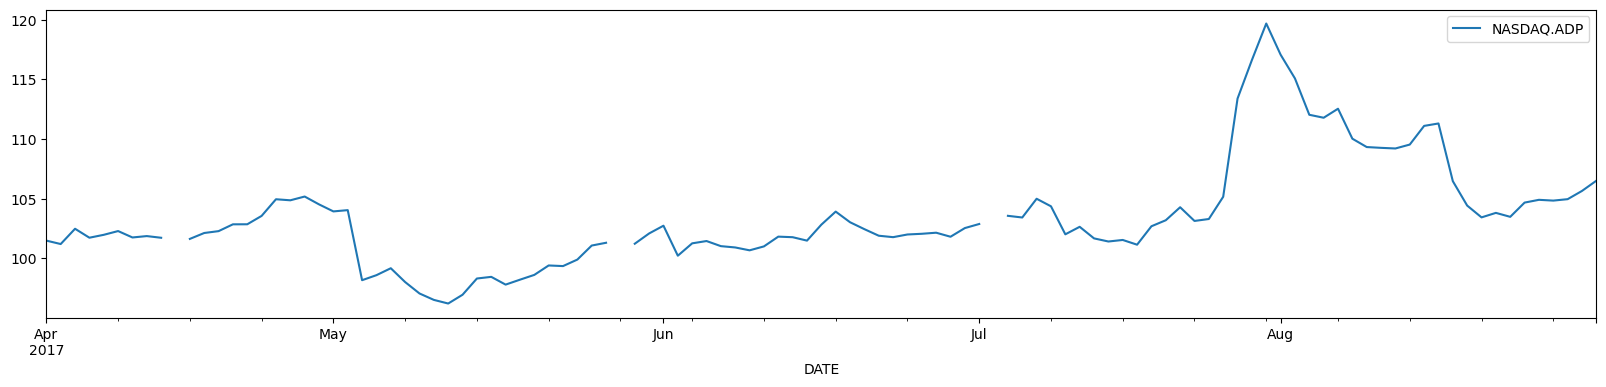

In [19]:
freq='B'
print(df.resample(freq).mean())
df.resample(freq).mean().plot(figsize=(20,4))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


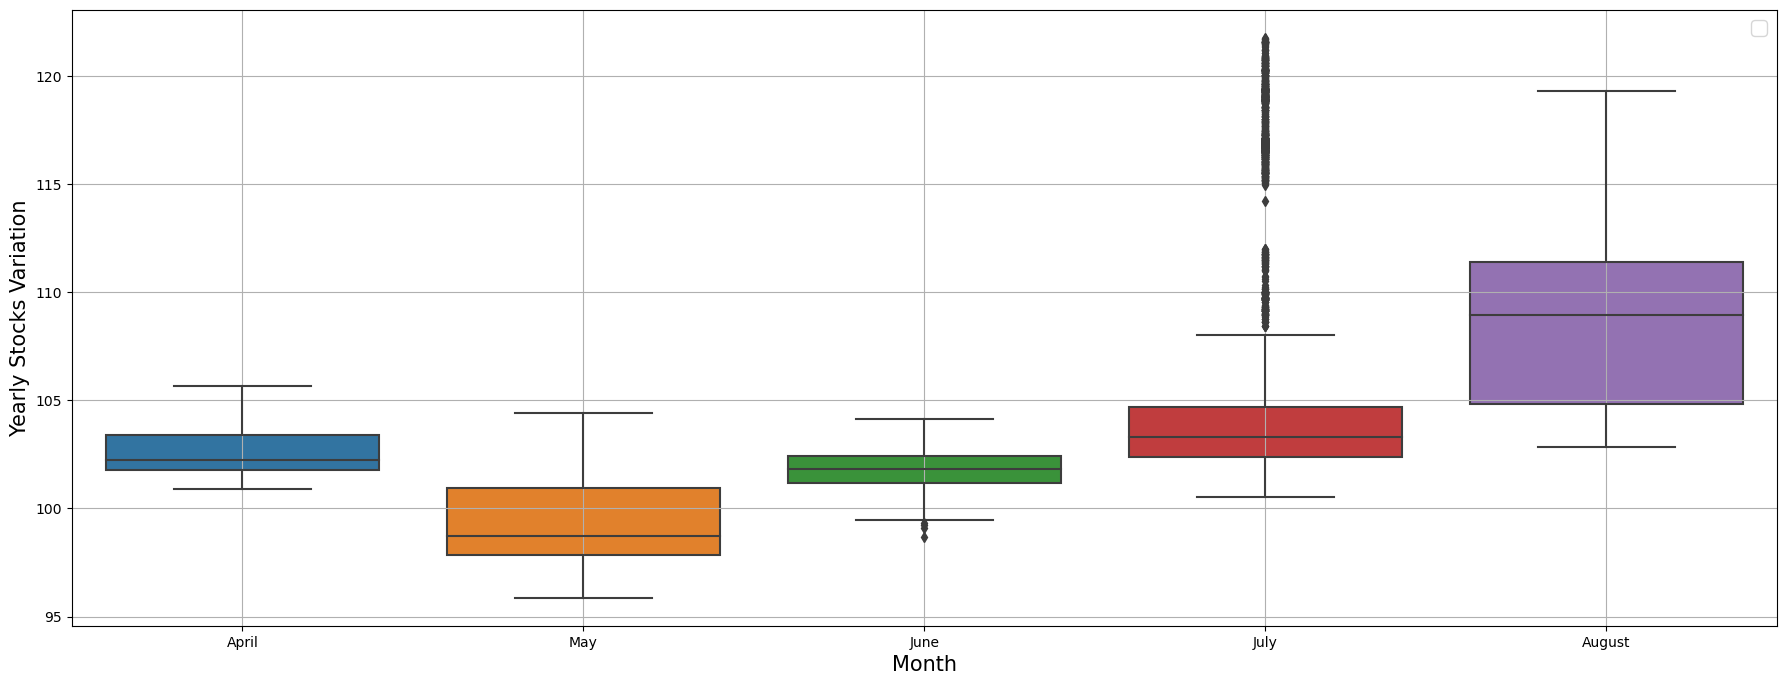

In [20]:
## Monthly Boxplot
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = df.index.month_name(),y = df.values[:,0],ax=ax)

plt.grid()
plt.xlabel('Month',fontsize=15)
plt.ylabel('Yearly Stocks Variation',fontsize=15)
plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)
plt.legend(fontsize="x-large")

In [21]:
data=df.resample(freq).mean()

In [23]:
data[data['NASDAQ.ADP'].isnull()]

,NASDAQ.ADP
DATE,
2017-04-14,NaN
2017-05-29,NaN
2017-07-04,NaN


<AxesSubplot:xlabel='DATE'>

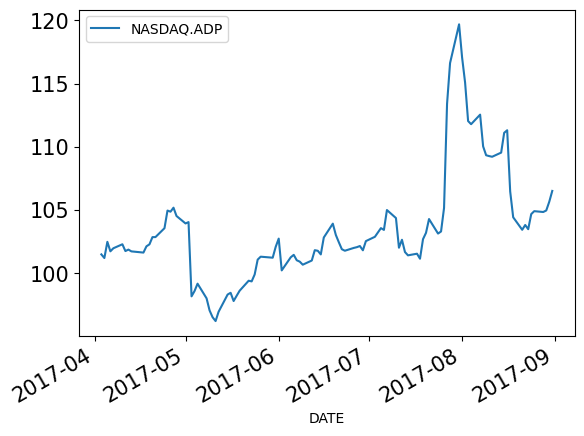

In [24]:
data=data.dropna()
data.plot()

## Decomposition

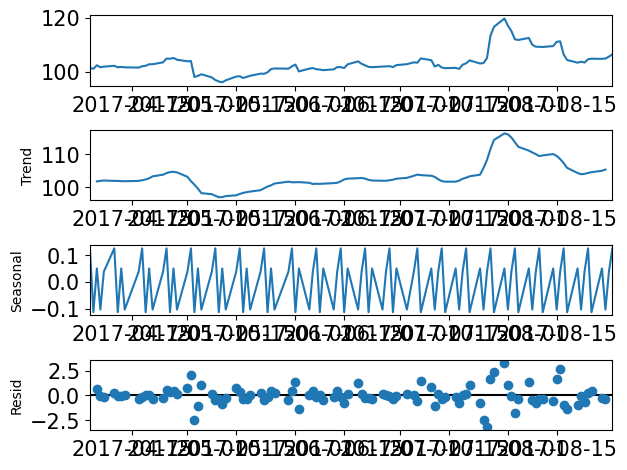

In [25]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(data,model='additive',period=5).plot()

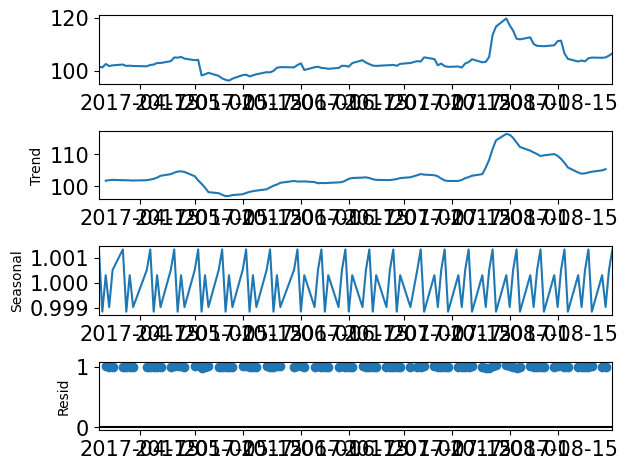

In [26]:
decomposition = seasonal_decompose(data,model='multiplicative',period=5)
decomposition.plot()
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.titlesize'] = 16

## Differencing

In [28]:
from statsmodels.tsa.stattools import adfuller
test_result=adfuller(data['NASDAQ.ADP'])

def adfuller_test(stock):
    result=adfuller(stock)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [29]:
adfuller_test(data['NASDAQ.ADP'])

ADF Test Statistic : -2.3079613854474292
p-value : 0.16941312167294542
#Lags Used : 1
Number of Observations Used : 104
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [30]:
data['NASDAQ.ADP First Difference']=data['NASDAQ.ADP']-data['NASDAQ.ADP'].shift(1)

C:\Users\sriva\AppData\Local\Temp\ipykernel_17756\2602285011.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['NASDAQ.ADP First Difference']=data['NASDAQ.ADP']-data['NASDAQ.ADP'].shift(1)


In [31]:
adfuller_test(data['NASDAQ.ADP First Difference'].dropna())

ADF Test Statistic : -7.660054103748165
p-value : 1.6980842773388654e-11
#Lags Used : 0
Number of Observations Used : 104
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


## PLOT ACF and PACF

C:\Users\sriva\AppData\Local\Temp\ipykernel_17756\28045069.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['station'] = data['NASDAQ.ADP'] - data['NASDAQ.ADP'].rolling(12).mean()
c:\Users\sriva\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


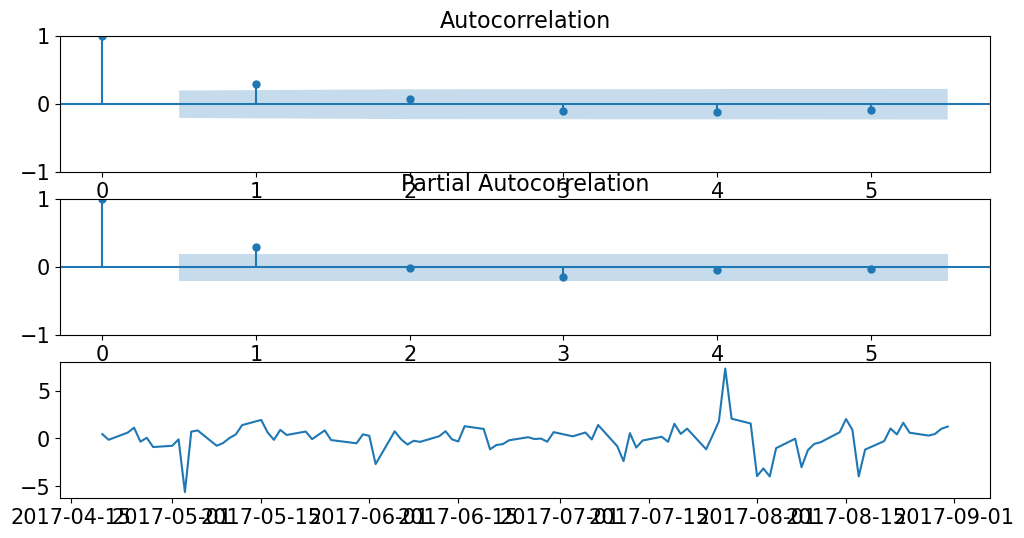

In [32]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Stationary data
data['station'] = data['NASDAQ.ADP'] - data['NASDAQ.ADP'].rolling(12).mean()

fig, ax = plt.subplots(3, figsize=(12,6))
x = (data.station.dropna() - data.station.dropna().shift(1)).dropna()
ax[0] = plot_acf(x, ax=ax[0], lags=5)
ax[1] = plot_pacf(x, ax=ax[1], lags=5)
ax[2].plot(x)

## Train Test Split

In [34]:
data.drop('NASDAQ.ADP First Difference',axis=1,inplace=True)
data.drop('station',axis=1,inplace=True)

C:\Users\sriva\AppData\Local\Temp\ipykernel_17756\2323392395.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop('NASDAQ.ADP First Difference',axis=1,inplace=True)
C:\Users\sriva\AppData\Local\Temp\ipykernel_17756\2323392395.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop('station',axis=1,inplace=True)


In [35]:
i=0.80
per=int(data.shape[0]*i)
per

84

In [36]:
train = data.iloc[:int(per+1)]
test = data.iloc[int(per+1):]

In [37]:
print(train.shape[0])
train.tail()

85


,NASDAQ.ADP
DATE,
2017-07-27,113.397380
2017-07-28,116.627374
2017-07-31,119.692106
2017-08-01,117.078113
2017-08-02,115.084337


In [38]:
print(test.shape[0])
test

21


,NASDAQ.ADP
DATE,
2017-08-03,112.036815
2017-08-04,111.788484
2017-08-07,112.544527
2017-08-08,110.030711
2017-08-09,109.329838
2017-08-10,109.262556
2017-08-11,109.210514
2017-08-14,109.538223
2017-08-15,111.104409


### pdq value iteration

In [39]:
import itertools
p=range(0,7)
d=range(1,2)
q=range(0,7)

pdq_combination=list(itertools.product(p,d,q))

#### for loop over rmse

In [40]:
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
warnings.filterwarnings('ignore')

In [41]:
order1=[]
rmse=[]

for pdq in pdq_combination:
    try:
        model=ARIMA(train['NASDAQ.ADP'],order=pdq).fit()
        pred=model.predict(start=train.shape[0],end=(train.shape[0]+test.shape[0]-1),dynamic=True)
        error=np.sqrt(mean_squared_error(test,pred))
        order1.append(pdq)
        rmse.append(error)
    except:
        continue

results=pd.DataFrame(index=order1,data=rmse,columns=['RMSE']).sort_values('RMSE')
results.head()

,RMSE
"(1, 1, 4)",4.010979
"(2, 1, 4)",4.086883
"(1, 1, 3)",4.106760
"(5, 1, 4)",4.515056
"(1, 1, 6)",4.591131


In [42]:
mod = ARIMA(train['NASDAQ.ADP'], order=(1,1,4))

results_Arima = mod.fit()

In [43]:
predicted_autoARIMA = results_Arima.predict(start=train.shape[0],end=(train.shape[0]+test.shape[0]-1),dynamic=True)
predicted_autoARIMA=pd.DataFrame(predicted_autoARIMA).set_index(test.index.copy())
predicted_autoARIMA.head()

,predicted_mean
DATE,
2017-08-03,113.395548
2017-08-04,112.376391
2017-08-07,111.821118
2017-08-08,111.417642
2017-08-09,111.107208


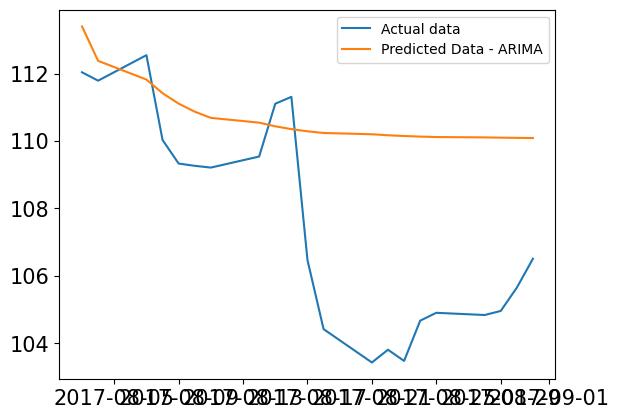

In [44]:
plt.plot(test,label='Actual data')
plt.plot(predicted_autoARIMA,label='Predicted Data - ARIMA')
plt.legend()

## SARIMAX

### Predict P,Q

In [45]:
P=range(0,6)
D=range(1,2)
Q=range(0,6)

pdq_combination=list(itertools.product(P,D,Q))

In [46]:
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
warnings.filterwarnings('ignore')

In [47]:
order1=[]
rmse=[]

for pdq in pdq_combination:
    try:
        model=sm.tsa.statespace.SARIMAX(train,order=(2, 1, 4),seasonal_order=(pdq[0],pdq[1],pdq[2],12)).fit()
        pred=model.predict(start=train.shape[0],end=(train.shape[0]+test.shape[0]-1),dynamic=True)
        error=np.sqrt(mean_squared_error(test,pred))
        order1.append(pdq)
        rmse.append(error)
    except Exception as e:
        raise e

results=pd.DataFrame(index=order1,data=rmse,columns=['RMSE']).sort_values('RMSE')
results.head(10)

,RMSE
"(4, 1, 4)",8.083569
"(4, 1, 5)",8.134758
"(2, 1, 5)",8.208700
"(3, 1, 4)",8.210340
"(3, 1, 1)",8.237659
"(5, 1, 4)",8.251515
"(5, 1, 3)",8.255552
"(0, 1, 4)",8.257594
"(2, 1, 4)",8.260397
"(4, 1, 2)",8.267896


In [48]:
model=sm.tsa.statespace.SARIMAX(data,order=(1, 1, 4),seasonal_order=(4,1,4,12)).fit()

In [49]:
predicted_SARIMA = model.predict(start=train.shape[0],end=(train.shape[0]+test.shape[0]-1),dynamic=True)
predicted_SARIMA=pd.DataFrame(predicted_SARIMA).set_index(test.index.copy())
predicted_SARIMA.head()

,predicted_mean
DATE,
2017-08-03,113.251882
2017-08-04,112.423357
2017-08-07,111.468141
2017-08-08,111.508955
2017-08-09,110.955733


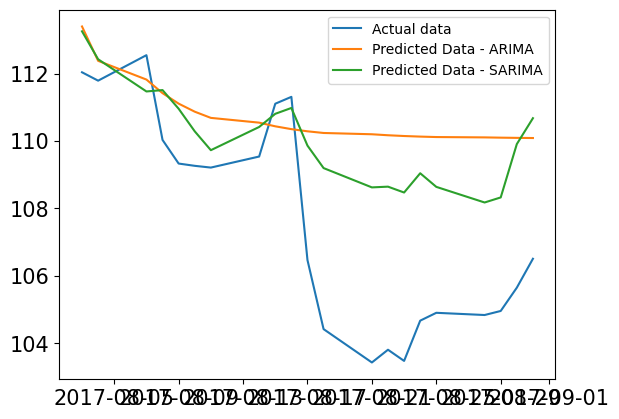

In [50]:
plt.plot(test,label='Actual data')
plt.plot(predicted_autoARIMA,label='Predicted Data - ARIMA')
plt.plot(predicted_SARIMA,label='Predicted Data - SARIMA')
plt.legend()

## Future Forecast

In [57]:
months=10
from pandas.tseries.offsets import DateOffset
future_dates=[data.index[-1]+ DateOffset(months=x)for x in range(0,months+1)]
future_data=pd.DataFrame(index=future_dates[1:],columns=data.columns)
forecast=model.forecast(steps=months)
future_stocks = pd.DataFrame(forecast).set_index(future_data.index)
future_stocks.rename(columns = {'predicted_mean':'NASDAQ.ADP'}, inplace = True)

In [58]:
data.tail()

,NASDAQ.ADP
DATE,
2017-08-25,104.903227
2017-08-28,104.837479
2017-08-29,104.957696
2017-08-30,105.648867
2017-08-31,106.506074


In [59]:
future_data.head()

,NASDAQ.ADP
2017-09-30,NaN
2017-10-31,NaN
2017-11-30,NaN
2017-12-31,NaN
2018-01-31,NaN


In [60]:
future_stocks.head()

,NASDAQ.ADP
2017-09-30,107.129104
2017-10-31,105.431455
2017-11-30,104.739615
2017-12-31,104.076938
2018-01-31,104.574215


<AxesSubplot:>

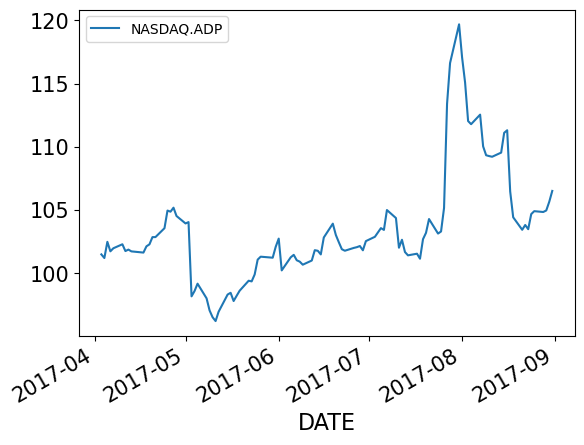

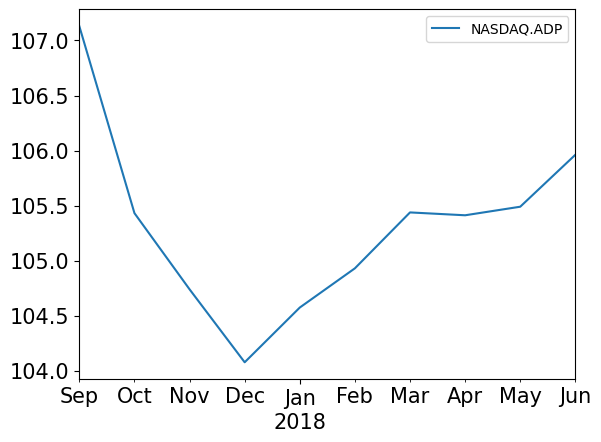

In [61]:
data.plot()
future_stocks.plot()

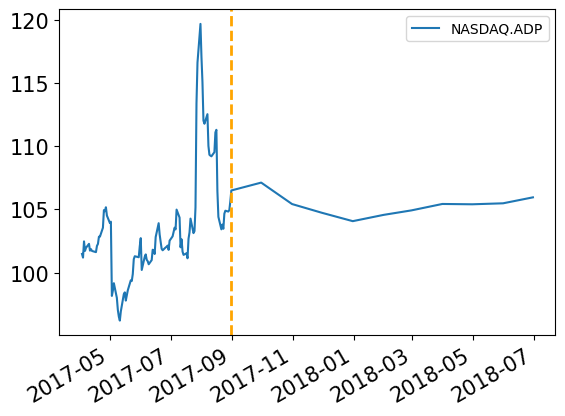

In [62]:
pd.concat([data,future_stocks]).plot()
plt.axvline('2017-08-31',color='orange',lw=2,ls='dashed')

In [63]:
future_stocks

,NASDAQ.ADP
2017-09-30,107.129104
2017-10-31,105.431455
2017-11-30,104.739615
2017-12-31,104.076938
2018-01-31,104.574215
2018-02-28,104.930495
2018-03-31,105.438220
2018-04-30,105.412259
2018-05-31,105.490038
2018-06-30,105.961859


In [64]:
model.save('../adp.pkl')